# Week 10 Instructor-Led Lab
### BGEN 632 | University of Montana MSBA Program
### Alex McKenzie | May 8, 2025

In [1]:
# load modules
import os
import numpy as np
import pandas as pd

# general plotting
import matplotlib.pyplot as plt

# data preprocessing (scaling and label encoding)
from sklearn import preprocessing

# pca module
from sklearn.decomposition import PCA as pca

# clustering modules
import sklearn.metrics as metcs
from scipy.cluster import hierarchy as hier
from sklearn import cluster as cls

# tree modules
from sklearn.feature_extraction.image import grid_to_graph
from sklearn import tree

In [2]:
# set working directory
os.chdir("/Users/AlexMcKenzie/Library/CloudStorage/GoogleDrive-alex.c.mckenzie@gmail.com/My Drive/Education/UM Graduate School/BGEN632/week10labs/data")
os.getcwd()

'/Users/AlexMcKenzie/Library/CloudStorage/GoogleDrive-alex.c.mckenzie@gmail.com/My Drive/Education/UM Graduate School/BGEN632/week10labs/data'

In [3]:
# load data
hosp_df = pd.read_table('calihospital.txt')

# inspect data types - we will use numerical data in PCA and a combo of numerical and categorical in the clustering analysis
hosp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HospitalID     61 non-null     int64  
 1   Name           61 non-null     object 
 2   Zip            61 non-null     object 
 3   Website        61 non-null     object 
 4   TypeControl    61 non-null     object 
 5   Teaching       61 non-null     object 
 6   DonorType      61 non-null     object 
 7   NoFTE          61 non-null     float64
 8   NetPatRev      61 non-null     float64
 9   InOperExp      61 non-null     float64
 10  OutOperExp     61 non-null     float64
 11  OperRev        61 non-null     int64  
 12  OperInc        61 non-null     int64  
 13  AvlBeds        61 non-null     int64  
 14  Work_ID        61 non-null     int64  
 15  LastName       61 non-null     object 
 16  FirstName      61 non-null     object 
 17  Gender         61 non-null     object 
 18  PositionID  

In [4]:
# Conduct principal component analysis with numerical variables in the dataset

# keep only desired columns - note: hospital ID is technically numerical (int64) but it is actually a categorical grouping variable in nature
pca_data = (hosp_df
            .filter([
                'NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc', 'AvlBeds'
            ]))

# inspect top 5 and bottom 5 rows
pca_data



,NoFTE,NetPatRev,InOperExp,OutOperExp,OperRev,OperInc,AvlBeds
0,327.0,1.355202e+05,2.052343e+07,3.491622e+07,49933713,-5505933,15
1,345.0,1.361567e+05,3.344754e+07,2.034860e+07,53351748,-444391,99
2,601.2,1.970943e+05,3.725418e+07,3.783245e+07,72933707,-2152920,107
3,400.0,1.391704e+05,2.338557e+07,2.466136e+07,51087341,3040415,55
4,262.0,1.167978e+05,1.368450e+07,1.515999e+07,42845642,14001153,42
...,...,...,...,...,...,...,...
56,2814.0,1.321032e+06,3.791029e+08,1.064302e+08,491523782,5990693,530
57,5218.0,1.187022e+06,2.912481e+08,1.093286e+08,439084836,38508125,462
58,6392.0,4.333934e+06,9.289621e+08,6.621559e+08,1650391999,59273999,445
59,1565.1,2.736281e+06,6.337903e+08,2.960207e+08,1074256998,144445998,730


In [5]:
# inspect summary statistics
pca_data.describe()

,NoFTE,NetPatRev,InOperExp,OutOperExp,OperRev,OperInc,AvlBeds
count,61.000000,6.100000e+01,6.100000e+01,6.100000e+01,6.100000e+01,6.100000e+01,61.000000
mean,1350.264262,6.695836e+05,1.662706e+08,9.015808e+07,2.562733e+08,-1.553491e+05,194.524590
std,2025.285385,1.097513e+06,2.827876e+08,1.372897e+08,4.249851e+08,7.154457e+07,221.832941
min,55.000000,1.417224e+04,1.436471e+06,3.787718e+06,5.235317e+06,-3.211633e+08,12.000000
25%,215.500000,6.579243e+04,1.368450e+07,1.426128e+07,2.416452e+07,-1.108177e+06,42.000000
50%,374.320000,1.723989e+05,3.184268e+07,3.491622e+07,6.339822e+07,1.572695e+06,99.000000
75%,1216.000000,5.409751e+05,1.737450e+08,9.306671e+07,1.998738e+08,6.198330e+06,234.000000
max,8000.000000,4.662582e+06,1.285631e+09,6.621559e+08,1.912179e+09,1.648724e+08,909.000000


In [17]:
# In this cell, we are conducting the PCA and obtaining the eigenvalues, as per the assignment instructions.

# get scaling function
scaler = preprocessing.StandardScaler()

# fit and transform the data, conduct PCA with 7 components
pca_result = pca(n_components=7).fit(scaler.fit_transform(pca_data))

# get eigenvalues
pca_result.explained_variance_

array([5.72134563e+00, 1.07657967e+00, 1.91383827e-01, 9.31699632e-02,
       3.29143500e-02, 1.27322677e-03, 5.91420738e-22])

# My initial recommendation:

### Keep all components in our eigenvalue set because they are all >= 1, which is a significant variance.

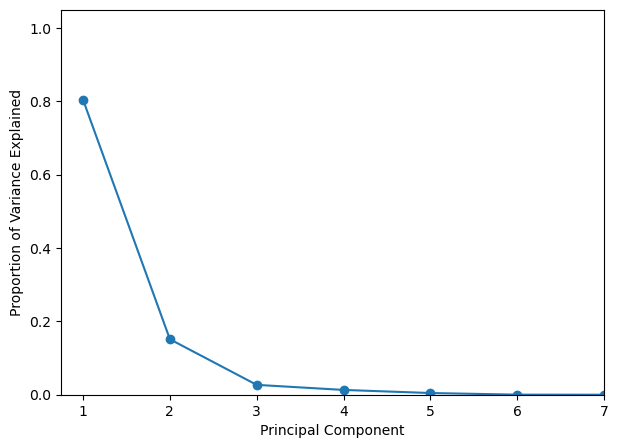

In [7]:
# generate the scree plot
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4,5,6,7], pca_result.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained') 
plt.xlabel('Principal Component') 
plt.xlim(0.75,4.25) 
plt.ylim(0,1.05) 
plt.xticks([1,2,3,4,5,6,7])

plt.show()

# My final recommendation:

### Keep only the first two principal components based on their disproportionate impact on the variance of the data set (e.g. 9.31699632e-02, and 5.91420738e-22).

In [8]:
# inspect first ten rows for columns with object datatypes
hosp_df.select_dtypes(include=['object']).head(10)

,Name,Zip,Website,TypeControl,Teaching,DonorType,LastName,FirstName,Gender,PositionTitle,StartDate
0,Mammoth Hospital,93546-0660,www.mammothhospital.com,District,Small/Rural,Charity,Web,David,M,Safety Inspection Member,1/1/2012
1,Victor Valley Community Hospital,92392,www.vvch.org,Non Profit,Small/Rural,Charity,Rodriguez,Jose,M,Regional Representative,1/1/2009
2,Pioneers Memorial Hospital,92227,www.pmhd.org,District,Small/Rural,Charity,Adamson,David,M,Regional Representative,1/1/2012
3,Ridgecrest Regional Hospital,93555,www.rrh.org,Non Profit,Small/Rural,Charity,Roberts,Melissa,F,Safety Inspection Member,1/1/2009
4,Barstow Community Hospital,92311,www.barstowhospital.com,Investor,Small/Rural,Charity,Iwata,Akira,M,Regional Representative,1/1/2011
5,St. Elizabeth Community Hospital,96080,redbluff.mercy.org/index.htm,Non Profit,Small/Rural,Charity,Marlin,Bill,M,Safety Inspection Member,1/1/2011
6,Ukiah Valley Medical Center,95482,www.uvmc.org,Non Profit,Small/Rural,Charity,Johanson,Sandy,F,Regional Representative,1/1/2012
7,Mountains Community Hospital,92352,www.mchcares.com,District,Small/Rural,Charity,Web,David,M,State Board Representative,1/1/2011
8,Colusa Regional Medical Center,95932-2954,www.colusamedicalcenter.org,Non Profit,Small/Rural,Charity,Tanner,Patricia,F,Acting Director,1/1/2009
9,St. Mary Medical Center,92307-2206,www.stmary4health.com,Non Profit,Small/Rural,Charity,Milgrom,Patricia,F,Safety Inspection Member,1/1/2011


In [9]:
# subset numerical variables and categorical variables
clust_data = (hosp_df
              .filter([
                  'NoFTE','NetPatRev','InOperExp','OutOperExp','OperRev','OperInc','AvlBeds',  # numerical
                  'Teaching', 'TypeControl', 'DonorType'                                       # categorical
              ]))

In [10]:
# inspect unique values for categorical variables
print(hosp_df['Teaching'].unique())
print(hosp_df['TypeControl'].unique())
print(hosp_df['DonorType'].unique())

['Small/Rural' 'Teaching']
['District' 'Non Profit' 'Investor' 'City/County']
['Charity' 'Alumni']


### K-means clustering analysis:

In [11]:
le = preprocessing.LabelEncoder()

In [12]:
km = cls.KMeans(n_clusters=2).fit(pca_data)
km.labels_

clust_data['Teaching'] = le.fit_transform(clust_data['Teaching'])

cm1 = metcs.confusion_matrix(clust_data.Teaching, km.labels_)
print(cm1)

[[44  0]
 [ 8  9]]


In [13]:
clust_data.TypeControl.unique()

km2 = cls.KMeans(n_clusters=4).fit(pca_data)
km2.labels_

clust_data['TypeControl'] = le.fit_transform(clust_data['TypeControl'])

cm2 = metcs.confusion_matrix(clust_data.TypeControl, km2.labels_)
print(cm2)

[[ 2  1  0  4]
 [14  0  0  0]
 [ 3  0  0  0]
 [27  3  3  4]]


In [14]:
clust_data.DonorType.unique()

km3 = cls.KMeans(n_clusters=2).fit(pca_data)
km3.labels_

clust_data['DonorType'] = le.fit_transform(clust_data['DonorType'])

cm3 = metcs.confusion_matrix(clust_data.DonorType, km3.labels_)
print(cm3)

[[ 9  8]
 [44  0]]


In [15]:
print("Teaching\n", cm1)
print("TypeControl\n",cm2)
print("DonorType\n",cm3)

Teaching
 [[44  0]
 [ 8  9]]
TypeControl
 [[ 2  1  0  4]
 [14  0  0  0]
 [ 3  0  0  0]
 [27  3  3  4]]
DonorType
 [[ 9  8]
 [44  0]]


# K-means cluster analysis:

### We should use "k=2" because the "Teaching" categorical variable, which has exactly two categories, provides a clear grouping in our confusion matrix. One cluster distinctly identifies nearly all "Non-teaching" hospitals, making this a meaningful and practically useful clustering solution.

### Note that I was confused as to why we might choose teaching over donor type, given similar results; I am effectively lost on the statistical approach. ChatGPT laid it out for me: "Even though both confusion matrices have similar numbers, the critical difference lies in the interpretability and practical significance:  

### Teaching clearly isolates one distinct group (non-teaching hospitals), perfectly identifying 44 out of 44 hospitals. This strong separation means your clusters have immediate practical meaning.  

### Real-world interpretation: You can confidently distinguish non-teaching hospitals from teaching hospitals.  

### DonorType, while similarly numerically strong in one cluster, has its second category evenly split between clusters, creating less practical clarity.  

### Real-world interpretation: It’s harder to interpret clusters since one donor type group is ambiguously split."

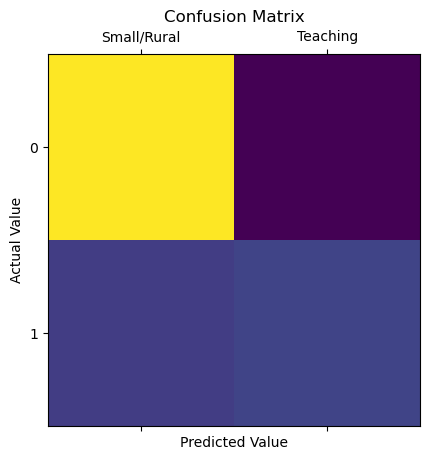

In [16]:
# color-based chart
plt.matshow(cm1)
plt.title('Confusion Matrix')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.xticks([0,1], ['Small/Rural','Teaching'])

plt.show()

# References:

#### I used ChatGPT to complete this assignment:

https://drive.google.com/file/d/1D4QySP73EHLVJceDewS45bVuHp9J-8iV/view?usp=sharing